In [266]:
#import the random modules
import random
#import the Numpy Module
import numpy as np
import timeit
import matplotlib.pyplot as plt
import pandas as pd
from citipy import citipy
import requests

In [267]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.53 ms ± 6.26 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [268]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1200)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1200)
lat_lngs = zip(lats, lngs)
lat_lngs

In [269]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [270]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

522

In [271]:
#import the datetime module from the datetime library
from datetime import datetime

In [272]:
from config import weather_api_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [273]:
#create an empty list to hold the weather data
city_data = []
#Print the beginning of the logging
print("Beginning Data Retrival")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1    

#loop through all the cities in our list

for i, city in enumerate(cities):
    

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrival
-----------------------------
Processing Record 1 of Set 1 | bambous virieux
Processing Record 2 of Set 1 | katsuura
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | krasnoarmeysk
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | cairns
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 15 of Set 1 | chokurdakh
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | gondanglegi
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | dikson
Processing Record 21 of Set 1 | russkaya polyana
Processing Record

Processing Record 39 of Set 4 | cherskiy
Processing Record 40 of Set 4 | esperance
Processing Record 41 of Set 4 | jimani
Processing Record 42 of Set 4 | concordia
Processing Record 43 of Set 4 | tambura
Processing Record 44 of Set 4 | mackay
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | san ramon
Processing Record 47 of Set 4 | nhulunbuy
Processing Record 48 of Set 4 | trincomalee
Processing Record 49 of Set 4 | kavieng
Processing Record 50 of Set 4 | sinnamary
Processing Record 1 of Set 5 | bethal
Processing Record 2 of Set 5 | saint-georges
Processing Record 3 of Set 5 | south bradenton
Processing Record 4 of Set 5 | olesnica
Processing Record 5 of Set 5 | pevek
Processing Record 6 of Set 5 | dzhubga
Processing Record 7 of Set 5 | lagoa
Processing Record 8 of Set 5 | san vicente
Processing Record 9 of Set 5 | hamilton
Processing Record 10 of Set 5 | rio gallegos
Processing Record 11 of Set 5 | bilma
Processing Record 12 of Set 5 | north bend
Processing Reco

Processing Record 33 of Set 8 | ormos korthiou
City not found. Skipping...
Processing Record 34 of Set 8 | ta khmau
Processing Record 35 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 36 of Set 8 | bangassou
Processing Record 37 of Set 8 | erzin
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | zeya
Processing Record 40 of Set 8 | pitogo
Processing Record 41 of Set 8 | belmonte
Processing Record 42 of Set 8 | ileza
Processing Record 43 of Set 8 | lesnoye
Processing Record 44 of Set 8 | upernavik
Processing Record 45 of Set 8 | zumarraga
Processing Record 46 of Set 8 | hami
Processing Record 47 of Set 8 | kalmunai
Processing Record 48 of Set 8 | peleduy
Processing Record 49 of Set 8 | koutiala
Processing Record 50 of Set 8 | amuntai
Processing Record 1 of Set 9 | buin
Processing Record 2 of Set 9 | benguela
Processing Record 3 of Set 9 | wum
Processing Record 4 of Set 9 | skjervoy
Processing Record 5 of Set 9 | kourou
Processing Record 6 of Set 9 |

In [274]:
len(city_data)

489

In [276]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bambous Virieux,-20.3428,57.7575,78.80,78,20,3.44,MU,2021-01-14 17:40:04
1,Katsuura,35.1333,140.3000,48.20,53,0,16.11,JP,2021-01-14 17:40:04
2,Butaritari,3.0707,172.7902,80.83,79,63,23.55,KI,2021-01-14 17:40:04
3,Tuktoyaktuk,69.4541,-133.0374,-7.60,84,90,6.91,CA,2021-01-14 17:40:04
4,Krasnoarmeysk,51.0239,45.6969,17.01,83,100,3.00,RU,2021-01-14 17:40:04


In [279]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bambous Virieux,20,MU,2021-01-14 17:40:04,78,-20.3428,57.7575,78.80,3.44
1,Katsuura,0,JP,2021-01-14 17:40:04,53,35.1333,140.3000,48.20,16.11
2,Butaritari,63,KI,2021-01-14 17:40:04,79,3.0707,172.7902,80.83,23.55
3,Tuktoyaktuk,90,CA,2021-01-14 17:40:04,84,69.4541,-133.0374,-7.60,6.91
4,Krasnoarmeysk,100,RU,2021-01-14 17:40:04,83,51.0239,45.6969,17.01,3.00


In [280]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [281]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

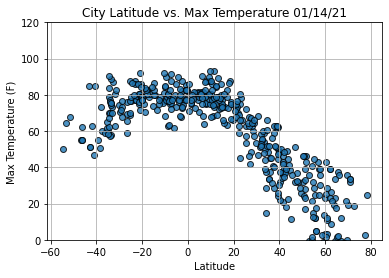

In [289]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

#build the scatter plot for lattidue vs. max temp
plt.scatter(lats, max_temps, edgecolor = "black", linewidth = 1, marker = "o", alpha = 0.8, label = "Cities" )

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.ylim(0, 120)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


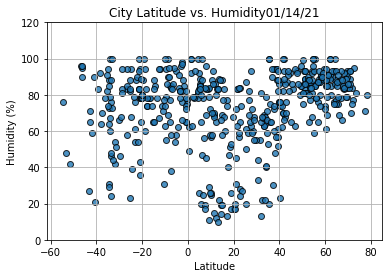

In [291]:
##build the scatter plot for lattidue vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidth = 1, marker = "o",alpha = 0.8, label = "Cities")

#add extra feature to the graph
plt.title(f"City Latitude vs. Humidity"+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.ylim(0, 120)
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")


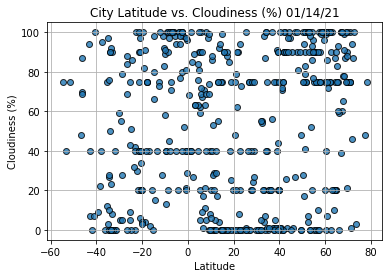

In [292]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

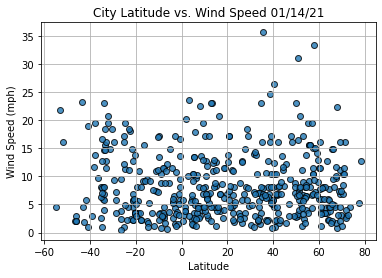

In [293]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()